# Customer Churn Prediction
**Objective:** To build and evaluate machine learning models capable of predicting customer churn based on account information, demographics, and services used. 

This project covers the end-to-end data science lifecycle, from data cleaning and preprocessing to model comparison, hyperparameter tuning, cross-validation, and feature selection.

## 1. Environment Setup & Data Loading
Before diving into the data, we need to set up our environment by importing the essential Python libraries:
* **Data Manipulation:** `pandas` and `numpy` for data wrangling.
* **Data Visualization:** `matplotlib` and `seaborn` to uncover trends and patterns.

In [23]:
# importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# loading the dataset
ch = pd.read_csv(r"C:\Users\Asus\Downloads\Churn.csv")

In [24]:
ch.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
ch.shape

(7043, 21)

In [26]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
ch.isnull().sum() # checking for nulls

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 2. Exploratory Data Analysis (EDA)
In this section, we explore the dataset to understand the distribution of our target variable (`Churn`) and discover how different features (like `MonthlyCharges` and `Contract`) impact customer retention. 

Visualizing these relationships helps validate our assumptions before feeding the data into machine learning models.

C:\Users\Asus\AppData\Local\Temp\ipykernel_16204\4237952408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ch, x='Churn', palette='viridis')


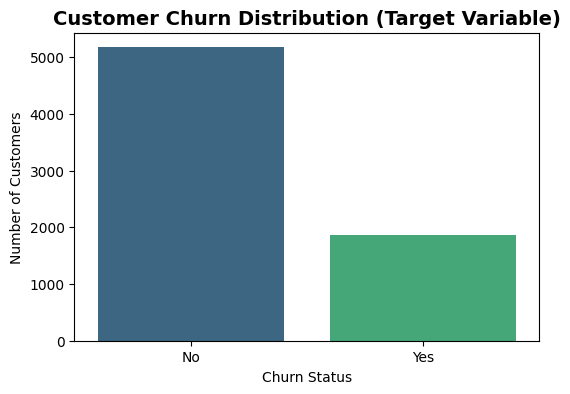

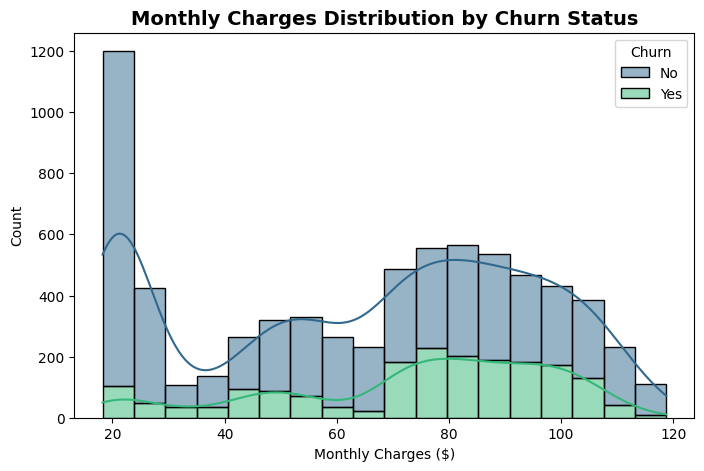

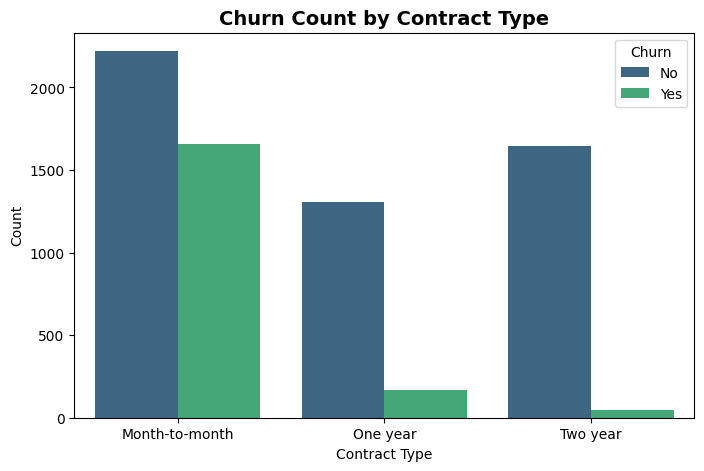

In [27]:


# 1. Target Variable Distribution: How many customers are actually churning?
plt.figure(figsize=(6, 4))
sns.countplot(data=ch, x='Churn', palette='viridis')
plt.title('Customer Churn Distribution (Target Variable)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Customers')
plt.xlabel('Churn Status')
plt.show()

# 2. Numerical Analysis: How do Monthly Charges affect Churn?
plt.figure(figsize=(8, 5))
sns.histplot(data=ch, x='MonthlyCharges', hue='Churn', multiple='stack', palette='viridis', kde=True)
plt.title('Monthly Charges Distribution by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.show()

# 3. Categorical Analysis: Does Contract Type impact Churn?
plt.figure(figsize=(8, 5))
sns.countplot(data=ch, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Count by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

1. The dataset is highly imbalanced. The number of customers who stayed (Churn = 'No') is significantly larger than the number of customers who left (Churn = 'Yes')

2. The histogram reveals a clear relationship between higher monthly costs and customer attrition. Customers with lower monthly charges (around the doller 20 mark) are very unlikely to churn. However, as the monthly charges increase—particularly in the $70 to $110 range—the proportion of customers churning noticeably spikes.

3. Contract type is one of the strongest predictors of churn. Customers on a "Month-to-month" contract have a drastically higher churn rate compared to those on long-term contracts. Conversely, customers on "One year" and "Two year" contracts show immense loyalty and very rarely churn.

## 3. Data Cleaning & Preprocessing
Before feeding data into our models, we need to ensure it is clean and properly formatted:
* **Missing Values:** The `TotalCharges` column is converted to numeric. Missing values are imputed using the median.
* **Feature Dropping:** The `customerID` column is dropped as it holds no predictive value.
* **Categorical Encoding:** We use `pd.get_dummies(drop_first=True)` to convert categorical text data into numerical format.

In [30]:
# Fix TotalCharges - convert to numeric and fill missing values
ch['TotalCharges'] = pd.to_numeric(ch['TotalCharges'], errors='coerce')
ch['TotalCharges'].fillna(ch['TotalCharges'].median(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16204\3009394251.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ch['TotalCharges'].fillna(ch['TotalCharges'].median(), inplace=True)


In [31]:
# Drop customerID column
ch = ch.drop('customerID', axis=1)

In [32]:
# Convert categorical to numerical using get_dummies
ch = pd.get_dummies(ch, drop_first=True)

In [33]:
# Separate features and target
df1 = ch.drop('Churn_Yes', axis=1)
df2 = ch['Churn_Yes']

## 4. Train-Test Split & Feature Scaling

To evaluate our models fairly, we must test them on data they haven't seen before. We will split our dataset into two parts:
* **Training Set (80%):** Used to teach the model the patterns of churn.
* **Testing Set (20%):** Used to evaluate how well the model generalizes to new customers.

Additionally, our features operate on vastly different scales (e.g., `tenure` ranges from 0-72, while `TotalCharges` can be in the thousands). We apply `StandardScaler` to normalize the numerical features so that larger numbers don't unfairly bias the model's predictions.

In [10]:
from sklearn.model_selection import train_test_split

# Split data
ch_train_x, ch_test_x, ch_train_y, ch_test_y = train_test_split(df1, df2, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
ch_train_x_scaled = scaler.fit_transform(ch_train_x)
ch_test_x_scaled = scaler.transform(ch_test_x)

## 5. Model Building & Evaluation

We will train multiple classification algorithms and compare their performance using metrics such as Accuracy, Precision, Recall, and the F1-Score.

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000,class_weight='balanced')

# fit and predict
model.fit(ch_train_x_scaled, ch_train_y)

# Predict
pred = model.predict(ch_test_x_scaled)

# Evaluation
tab = confusion_matrix(ch_test_y, pred)
print("Logistic Regression Results:")
print(tab)
print(classification_report(ch_test_y, pred))

Logistic Regression Results:
[[746 290]
 [ 66 307]]
              precision    recall  f1-score   support

       False       0.92      0.72      0.81      1036
        True       0.51      0.82      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(ch_train_x_scaled, ch_train_y)

# Predict
pred = rfc.predict(ch_test_x_scaled)

# Evaluation
tab = confusion_matrix(ch_test_y, pred)
print("Random Forest Results:")
print(tab)
print(classification_report(ch_test_y, pred))

Random Forest Results:
[[950  86]
 [205 168]]
              precision    recall  f1-score   support

       False       0.82      0.92      0.87      1036
        True       0.66      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced')

dt.fit(ch_train_x_scaled, ch_train_y)

# Predict
pred = dt.predict(ch_test_x_scaled)

# Evaluation
tab = confusion_matrix(ch_test_y, pred)
print("Decision Tree (Entropy) Results:")
print(tab)
print(classification_report(ch_test_y, pred))

Decision Tree (Entropy) Results:
[[855 181]
 [197 176]]
              precision    recall  f1-score   support

       False       0.81      0.83      0.82      1036
        True       0.49      0.47      0.48       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [48]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(class_weight='balanced')

dt1.fit(ch_train_x_scaled, ch_train_y)

# Predict
pred = dt1.predict(ch_test_x_scaled)

# Evaluation
tab = confusion_matrix(ch_test_y, pred)
print("Decision Tree (Gini) Results:")
print(tab)
print(classification_report(ch_test_y, pred))

Decision Tree (Gini) Results:
[[862 174]
 [185 188]]
              precision    recall  f1-score   support

       False       0.82      0.83      0.83      1036
        True       0.52      0.50      0.51       373

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.74      1409



MODEL COMPARISON
                  Model  Accuracy
          Random Forest  0.793471
    Logistic Regression  0.747339
   Decision Tree (Gini)  0.745209
Decision Tree (Entropy)  0.731725

Best Model: Random Forest
Best Accuracy: 0.7935


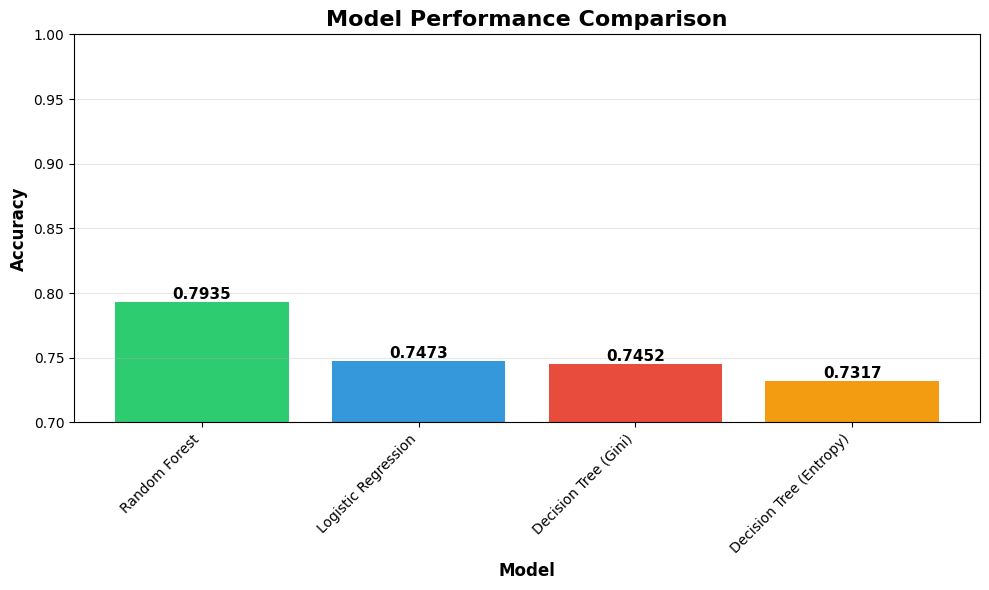

In [49]:
# Compare all models
from sklearn.metrics import accuracy_score

# Store results
results = []

# Logistic Regression
lr_accuracy = accuracy_score(ch_test_y, model.predict(ch_test_x_scaled))
results.append(['Logistic Regression', lr_accuracy])

# Random Forest
rf_accuracy = accuracy_score(ch_test_y, rfc.predict(ch_test_x_scaled))
results.append(['Random Forest', rf_accuracy])

# Decision Tree (Entropy)
dt_accuracy = accuracy_score(ch_test_y, dt.predict(ch_test_x_scaled))
results.append(['Decision Tree (Entropy)', dt_accuracy])

# Decision Tree (Gini)
dt1_accuracy = accuracy_score(ch_test_y, dt1.predict(ch_test_x_scaled))
results.append(['Decision Tree (Gini)', dt1_accuracy])

# Create comparison dataframe
comparison_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("="*50)
print("MODEL COMPARISON")
print("="*50)
print(comparison_df.to_string(index=False))
print("="*50)
print(f"\nBest Model: {comparison_df.iloc[0]['Model']}")
print(f"Best Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")

# Visualize comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], 
               color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 1.0)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Hyperparameter Tuning (GridSearchCV)

Even a strong baseline model can be improved by fine-tuning its internal settings
`GridSearchCV` will run a 5-fold cross-validation for every combination and output the absolute best parameters for our dataset.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid (with class imbalance)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000],
    'class_weight': [None, 'balanced']   # <- handle imbalance
}

# Create logistic regression model
lr = LogisticRegression(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',   # for imbalance you can also try 'f1' or 'roc_auc'
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
print("Starting GridSearchCV...")
grid_search.fit(ch_train_x_scaled, ch_train_y)

# Best parameters and score
print("\n" + "="*50)
print("GRIDSEARCH RESULTS")
print("="*50)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")
print("="*50)

# Train with best parameters
best_lr = grid_search.best_estimator_
pred = best_lr.predict(ch_test_x_scaled)

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("\nTest Set Results:")
print(f"Accuracy: {accuracy_score(ch_test_y, pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(ch_test_y, pred))
print("\nClassification Report:")
print(classification_report(ch_test_y, pred))


Starting GridSearchCV...
Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\Asus\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Asus\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(



GRIDSEARCH RESULTS
Best Parameters: {'C': 100, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score: 0.8023

Test Set Results:
Accuracy: 0.8197

Confusion Matrix:
[[934 102]
 [152 221]]

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.68      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000]
}

# Create logistic regression model
lr = LogisticRegression(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
print("Starting GridSearchCV...")
grid_search.fit(ch_train_x_scaled, ch_train_y)

# Best parameters and score
print("\n" + "="*50)
print("GRIDSEARCH RESULTS")
print("="*50)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")
print("="*50)

# Train with best parameters
best_lr = grid_search.best_estimator_
pred = best_lr.predict(ch_test_x_scaled)

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("\nTest Set Results:")
print(f"Accuracy: {accuracy_score(ch_test_y, pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(ch_test_y, pred))
print("\nClassification Report:")
print(classification_report(ch_test_y, pred))

Starting GridSearchCV...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Asus\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Asus\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(



GRIDSEARCH RESULTS
Best Parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score: 0.8023

Test Set Results:
Accuracy: 0.8197

Confusion Matrix:
[[934 102]
 [152 221]]

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.68      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



## 7. Model Validation (K-Fold Cross-Validation)

A single train-test split can sometimes be "lucky" or "unlucky" depending on how the data is randomly divided. To ensure our model's performance is stable and generalizes well to entirely unseen data, we perform **5-Fold Cross-Validation**.

This technique splits the training data into 5 equal parts (folds), trains the model on 4 parts, and tests it on the 1 remaining part. It repeats this process 5 times, giving us a mean accuracy score and a standard deviation, which proves the model's reliability.

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest (with class imbalance options)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced', 'balanced_subsample']  # imbalance handling
}

# Create Random Forest model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',  # for imbalance you can also try 'f1' or 'roc_auc'
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
print("Starting Random Forest GridSearchCV...")
rf_grid_search.fit(ch_train_x_scaled, ch_train_y)

# Best parameters and score
print("\n" + "="*50)
print("RANDOM FOREST GRIDSEARCH RESULTS")
print("="*50)
print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"Best CV Score: {rf_grid_search.best_score_:.4f}")
print("="*50)

# Train with best parameters
best_rf = rf_grid_search.best_estimator_
rf_pred = best_rf.predict(ch_test_x_scaled)

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("\nRandom Forest Test Set Results:")
print(f"Accuracy: {accuracy_score(ch_test_y, rf_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(ch_test_y, rf_pred))
print("\nClassification Report:")
print(classification_report(ch_test_y, rf_pred))


Starting Random Forest GridSearchCV...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits

RANDOM FOREST GRIDSEARCH RESULTS
Best Parameters: {'class_weight': None, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best CV Score: 0.8051

Random Forest Test Set Results:
Accuracy: 0.8105

Confusion Matrix:
[[956  80]
 [187 186]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.92      0.88      1036
        True       0.70      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In the Grid seach Results Logistic is better than Random forest overhere

In churn problems, recall and F1 for the positive class are usually more important than a tiny gain in precision, because missing churners is costlier than flagging a few extra non‑churners.

Logistic has higher recall (0.59 vs 0.50) and higher F1 (0.64 vs 0.58) for churn, with slightly better overall accuracy and weighted averages too.

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
lr_model = LogisticRegression(C =100, max_iter = 1000, penalty= 'l1', solver = 'liblinear')

# Perform cross-validation (5-fold)
cv_scores = cross_val_score(lr_model, ch_train_x_scaled, ch_train_y, cv=5, scoring='accuracy')

# Print only scores
print("Cross-Validation Scores:")
print(cv_scores)
print(f"\nMean CV Score: {cv_scores.mean():.4f}")
print(f"Std CV Score: {cv_scores.std():.4f}")

C:\Users\Asus\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Asus\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
C:\Users\Asus\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(

Cross-Validation Scores:
[0.80834073 0.80922804 0.79769299 0.7905945  0.80550622]

Mean CV Score: 0.8023
Std CV Score: 0.0071


In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 1. Initialize the model and RFE
model = LogisticRegression(C =100, max_iter = 1000, penalty= 'l1', solver = 'liblinear')
rfe = RFE(estimator=model, n_features_to_select=10)

# 2. Fit RFE
rfe.fit(ch_train_x_scaled, ch_train_y)

# 3. Get the list of selected feature names directly
selected_features = ch_train_x.columns[rfe.support_].tolist()

print("Top 10 Selected Features:")
print(selected_features)

# 4. Filter your datasets to use only these features
train_x_final = ch_train_x_scaled[:, rfe.support_]
test_x_final = ch_test_x_scaled[:, rfe.support_]

# 5. Final Train/Test
model.fit(train_x_final, ch_train_y)
print(f"Final Accuracy: {model.score(test_x_final, ch_test_y):.4f}")

C:\Users\Asus\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Asus\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
C:\Users\Asus\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(

Top 10 Selected Features:
['tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year']
Final Accuracy: 0.8084


In [ ]:
# after feature slection with hyper parametrs we are getting Accuracy: 0.8084